# Détection des maladies chez la feuille

## 1 - Objectif

Nous disposons d'une base de données contenant des images de feuille. Parmi ces feuilles, certaines sont malades. Nous souhaitons, étant donnée une image de feuille nouvelle, déterminer si elle est malade, et le cas échéant classifier sa maladie (parmi 4 possibilités). Pour ce faire, nous allons utiliser un réseau de neurones construit autour d'une couche de convolution (pour le traitement d'images).

## 2 - Chargement des librairies

In [1]:
# Librairies natives

from IPython.display import Image
import os
import random
import warnings
warnings.filterwarnings('ignore')

# Libraires importées

import cv2
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [2]:
FOLDER = "data"
diseases = ["Bacteria", "Fungi", "Nematodes", "Normal", "Virus"]

Maladie : Bacteria


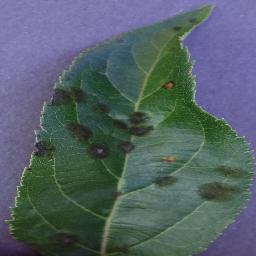

Maladie : Fungi


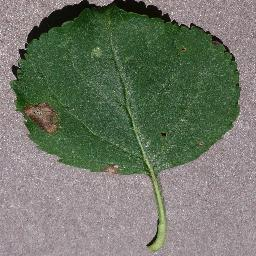

Maladie : Nematodes


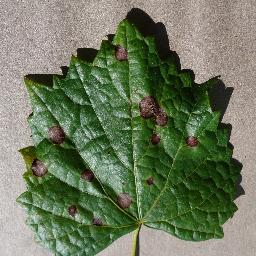

Maladie : Normal


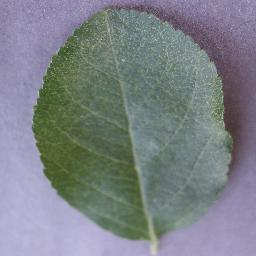

Maladie : Virus


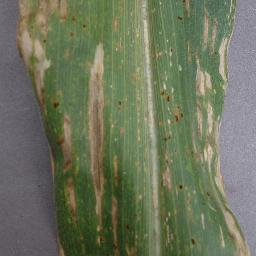

In [3]:
for disease in diseases:
        print("Maladie : {}".format(disease))
        images = os.listdir(os.path.join(FOLDER, disease))
        im = Image(os.path.join(FOLDER, disease) + "/" + images[0]) # select first image of each disease folder
        display(im)

In [4]:
# Préparation des données pour le réseau de neurones
SIZE = (100, 100)

def transform_data () : # redimensionnement des images, convertion en tableaux et création de la donnée principale
    data = []
    for disease in diseases:
        i = 0
        images_of_disease = os.listdir(os.path.join(FOLDER, disease))
        for image in images_of_disease:
            i += 1
            im = PIL.Image.open(os.path.join(FOLDER, disease, image)).resize(SIZE)
            im_data = np.array(im, dtype = "uint8")
            data.append([im_data, disease])
        print("{} images sont labelisées {}.".format(i, disease))
    return data

In [5]:
data = transform_data()

49 images sont labelisées Bacteria.
50 images sont labelisées Fungi.
49 images sont labelisées Nematodes.
40 images sont labelisées Normal.
50 images sont labelisées Virus.


In [6]:
print("Nous disposons de {} images labelisées.".format(len(data)))

Nous disposons de 238 images labelisées.


In [7]:
data[0][0].shape

(100, 100, 3)

In [8]:
np.random.shuffle(data) # mélange des données pour éviter les biais

In [9]:
# Data Augmentation
aug = ImageDataGenerator(rotation_range = 45, # rotation range +- 45°
                        width_shift_range = 0.1, # images will be shifted horizontally by +- 10%
                        height_shift_range = 0.1,
                        fill_mode = "nearest") # use the nearest pixels to fill the blanks after a shift

In [10]:
# build label correspondance
label_correspondance = {}
i = 0
for disease in diseases:
    label_correspondance[disease] = i
    i += 1
print(label_correspondance)

{'Bacteria': 0, 'Fungi': 1, 'Nematodes': 2, 'Normal': 3, 'Virus': 4}


In [11]:
# Création du jeu d'entraînement (train et validation)
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

In [12]:
for i in range(len(y)):
    label = label_correspondance[y[i]]
    y[i] = int(label)

In [13]:
X, y = np.array(X), np.array(y)
X = X/255.0
print(X.shape, y.shape)

(238, 100, 100, 3) (238,)


In [14]:
y = to_categorical(y, num_classes = 5)

In [15]:
# Build the neural network
input_shape = X.shape[1:]
print("Entrée du réseau :", input_shape)

model1 = Sequential()

model1.add(Conv2D(filters = 1, kernel_size = 3, input_shape = input_shape))
print("Sortie de la couche de convolution :", model1.output_shape)
           
model1.add(MaxPooling2D(pool_size = (2, 2)))
print("Sortie de la couche de Pooling :", model1.output_shape)
           
model1.add(Flatten())
print("Sortie de la couche de Flatten :", model1.output_shape)
           
model1.add(Dense(5, activation = "softmax"))
print("Sortie du réseau :", model1.output_shape)

Entrée du réseau : (100, 100, 3)
Sortie de la couche de convolution : (None, 98, 98, 1)
Sortie de la couche de Pooling : (None, 49, 49, 1)
Sortie de la couche de Flatten : (None, 2401)
Sortie du réseau : (None, 5)


In [16]:
# Compile the model (accuracy = ratio de bonnes classifications)
model1.compile(loss = "categorical_crossentropy", # fonction de perte de classification multi-classes
                optimizer = "adam", 
                metrics = ["accuracy"]) 

### Préparation des données d'entraînement

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [18]:
X_train = X_train
X_test = X_test
# 0-1 range values will improve the training speed

In [19]:
history = model1.fit(X_train,
                    y_train,
                    batch_size = 1,
                    validation_data = (X_test, y_test),
                    epochs = 10,
                    verbose = 1)

Epoch 1/10
190/190 [==============================] - 7s 32ms/step - loss: 1.2989 - accuracy: 0.5181 - val_loss: 0.7686 - val_accuracy: 0.6875
Epoch 2/10
190/190 [==============================] - 3s 14ms/step - loss: 0.5446 - accuracy: 0.8341 - val_loss: 0.8844 - val_accuracy: 0.6042
Epoch 3/10
190/190 [==============================] - 3s 13ms/step - loss: 0.3978 - accuracy: 0.9045 - val_loss: 0.4665 - val_accuracy: 0.8750
Epoch 4/10
190/190 [==============================] - 3s 15ms/step - loss: 0.2524 - accuracy: 0.9437 - val_loss: 0.4231 - val_accuracy: 0.9167
Epoch 5/10
190/190 [==============================] - 3s 17ms/step - loss: 0.1944 - accuracy: 0.9676 - val_loss: 0.4670 - val_accuracy: 0.8958
Epoch 6/10
190/190 [==============================] - 3s 14ms/step - loss: 0.1441 - accuracy: 0.9794 - val_loss: 0.3501 - val_accuracy: 0.9167
Epoch 7/10
190/190 [==============================] - 2s 13ms/step - loss: 0.1133 - accuracy: 1.0000 - val_loss: 0.3698 - val_accuracy: 0.8958

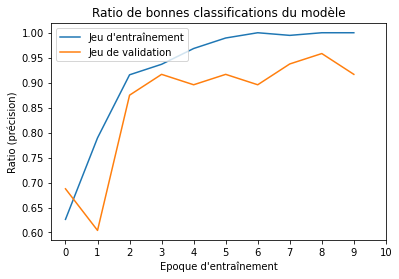

In [20]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Ratio de bonnes classifications du modèle")
plt.ylabel("Ratio (précision)")
plt.xlabel("Epoque d'entraînement")
plt.xticks([i for i in range(11)])
plt.legend(["Jeu d'entraînement", "Jeu de validation"], loc = "upper left")
plt.show()

### Un exemple d'exécution

On considère une image en particulier :

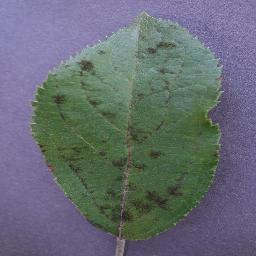

In [21]:
im = Image("test.jpg")
display(im)

In [22]:
im = PIL.Image.open("test.jpg").resize(SIZE)
data = np.array(im, dtype = "uint8")

In [23]:
data.shape

(100, 100, 3)

In [24]:
model1.input_shape

(None, 100, 100, 3)

In [25]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 1)         28        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2401)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 12010     
Total params: 12,038
Trainable params: 12,038
Non-trainable params: 0
_________________________________________________________________


In [26]:
data = data/255.0

In [27]:
data = data.reshape(-1, 100, 100, 3)

In [28]:
data.shape

(1, 100, 100, 3)

In [29]:
model1.predict(data)

array([[6.4149761e-01, 1.0553817e-02, 1.3960915e-03, 3.4655020e-01,
        2.4056558e-06]], dtype=float32)

### Différence entre "Nématodes" et "Bactéries"

Nematodes


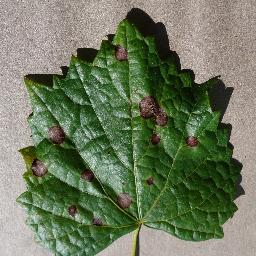

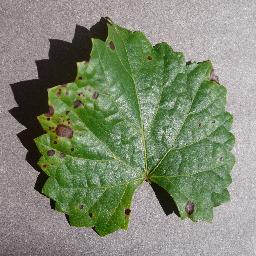

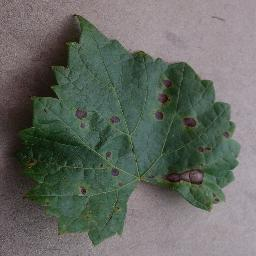

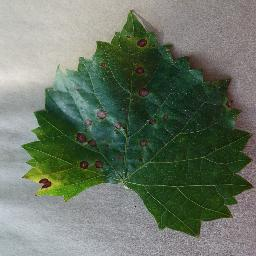

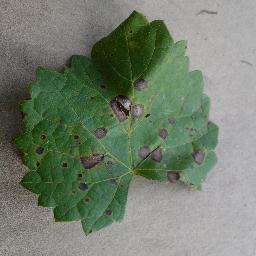

Bacteria


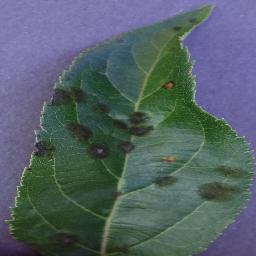

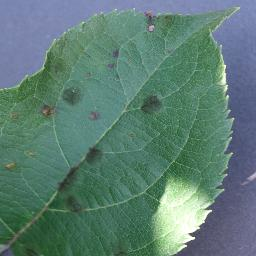

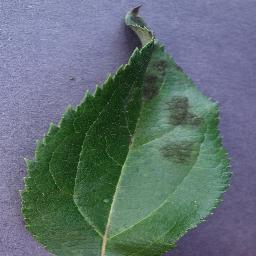

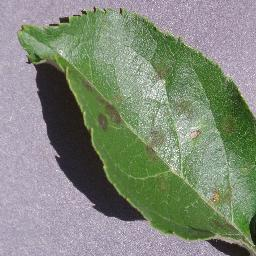

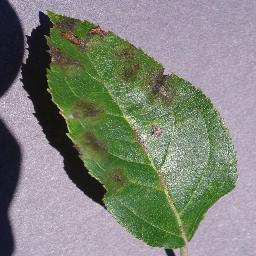

In [30]:
for dis in ["Nematodes", "Bacteria"]:
    print(dis)
    images = os.listdir(os.path.join(FOLDER, dis))
    for i in range(5):
        im = Image(os.path.join(FOLDER, dis) + "/" + images[i])
        display(im)